Created directory: data_sample_2022_2023
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 8 stations (2.63 seconds).
Saved plot to data_sample_2022_2023/snow_depth_plot.png
Saved utprv data to data_sample_2022_2023/snow_depth_utprv_dec2022_mar2023.parquet
Saved utorm data to data_sample_2022_2023/snow_depth_utorm_dec2022_mar2023.parquet
Saved utheb data to data_sample_2022_2023/snow_depth_utheb_dec2022_mar2023.parquet
Saved utdan data to data_sample_2022_2023/snow_depth_utdan_dec2022_mar2023.parquet
Saved coopvelu1 data to data_sample_2022_2023/snow_depth_coopvelu1_dec2022_mar2023.parquet
Saved coopdsnu1 data to data_sample_2022_2023/snow_depth_coopdsnu1_dec2022_mar2023.parquet
Saved agd data to data_sample_2022_2023/snow_depth_agd_dec2022_mar2023.parquet
Saved briu1 data to data_sample_2022_2023/snow_depth_briu1_dec2022_mar2023.parquet


stid,date_time,variable,sensor_index,is_derived,value,units,id,name,elevation,latitude,longitude,mnet_id,state,timezone,elev_dem,period_of_record_start,period_of_record_end,qc_flagged,is_restricted,restricted_metadata,is_active
str,"datetime[μs, UTC]",str,u32,bool,f64,str,u32,str,f64,f64,f64,u32,str,str,f64,"datetime[μs, UTC]","datetime[μs, UTC]",bool,bool,bool,bool
"""AGD""",2022-12-01 00:00:00 UTC,"""snow_depth""",1,false,45.0,"""Inches""",527,"""ALTA - GUARD HOUSE""",8799.0,40.5905,-111.638,6,"""UT""","""America/Denver""",8713.9,1998-11-25 00:00:00 UTC,2025-06-25 22:40:00 UTC,false,false,false,true
"""AGD""",2022-12-01 00:10:00 UTC,"""snow_depth""",1,false,45.0,"""Inches""",527,"""ALTA - GUARD HOUSE""",8799.0,40.5905,-111.638,6,"""UT""","""America/Denver""",8713.9,1998-11-25 00:00:00 UTC,2025-06-25 22:40:00 UTC,false,false,false,true
"""AGD""",2022-12-01 00:20:00 UTC,"""snow_depth""",1,false,45.0,"""Inches""",527,"""ALTA - GUARD HOUSE""",8799.0,40.5905,-111.638,6,"""UT""","""America/Denver""",8713.9,1998-11-25 00:00:00 UTC,2025-06-25 22:40:00 UTC,false,false,false,true
"""AGD""",2022-12-01 00:30:00 UTC,"""snow_depth""",1,false,45.0,"""Inches""",527,"""ALTA - GUARD HOUSE""",8799.0,40.5905,-111.638,6,"""UT""","""America/Denver""",8713.9,1998-11-25 00:00:00 UTC,2025-06-25 22:40:00 UTC,false,false,false,true
"""AGD""",2022-12-01 00:40:00 UTC,"""snow_depth""",1,false,45.0,"""Inches""",527,"""ALTA - GUARD HOUSE""",8799.0,40.5905,-111.638,6,"""UT""","""America/Denver""",8713.9,1998-11-25 00:00:00 UTC,2025-06-25 22:40:00 UTC,false,false,false,true


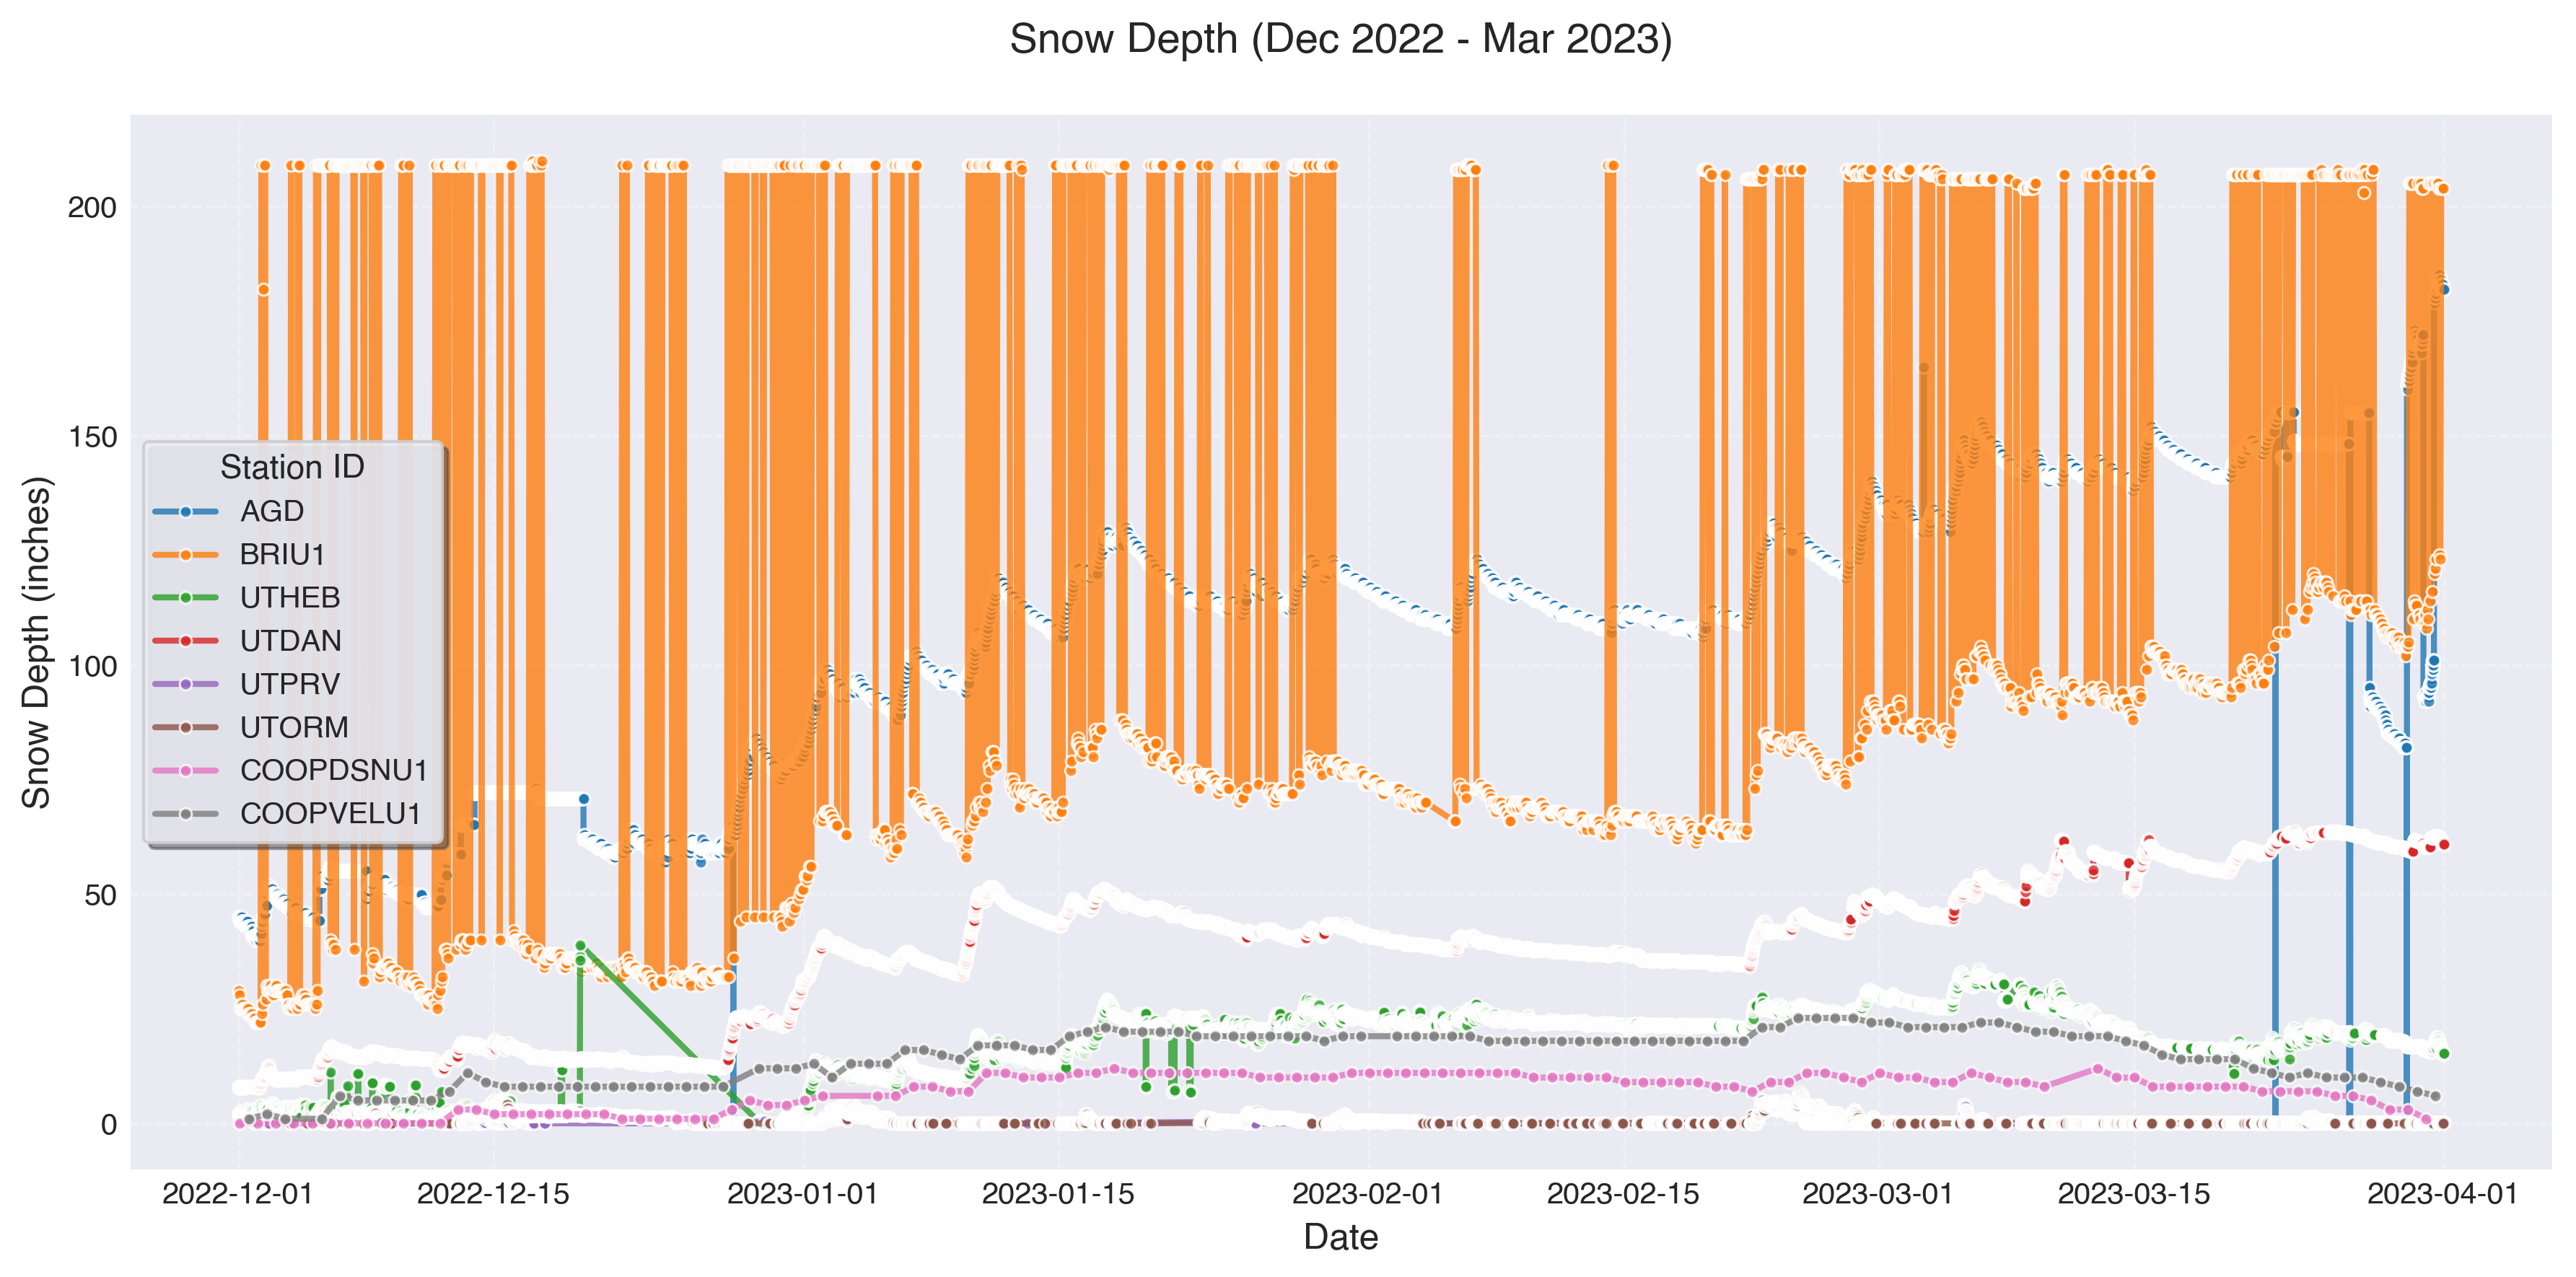

In [2]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
import synoptic
import os

# Set up clean plotting style
plt.rcParams.update({
    'figure.dpi': 300, 'font.size': 10, 'axes.linewidth': 1.5, 'lines.linewidth': 2,
    'xtick.direction': 'in', 'ytick.direction': 'in', 'axes.labelsize': 12,
    'axes.titlesize': 14, 'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'Arial'], 'savefig.dpi': 300, 'savefig.bbox': 'tight'
})

# Create a directory to store the data
data_dir = "data_sample_2022_2023"
os.makedirs(data_dir, exist_ok=True)
print(f"Created directory: {data_dir}")

# Define date range: Dec 2022 - Mar 2023
start_date = datetime(2022, 12, 1)
end_date = datetime(2023, 3, 31, 23, 59, 59)

# Token provided
YOUR_TOKEN = ""

# Station IDs
stations = ["utprv", "utorm", "utheb", "utdan", "coopvelu1", "coopdsnu1", "agd", "briu1"]
stations_str = ",".join(stations)

# Fetch the data for the specified date range
df = synoptic.TimeSeries(
    token=YOUR_TOKEN,
    stid=stations_str,
    start=start_date,
    end=end_date,
    vars="snow_depth",
    units="english",
).df()

# Plot the data
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    df,
    x="date_time",
    y="value",
    hue="stid",
    marker="o",
    markersize=4,
    alpha=0.8
)

ax.set_title("Snow Depth (Dec 2022 - Mar 2023)", fontweight='bold', pad=20)
ax.set_ylabel("Snow Depth (inches)", fontweight='semibold')
ax.set_xlabel("Date", fontweight='semibold')
ax.grid(alpha=0.3, zorder=0, linewidth=0.8, linestyle="--")

# Improve legend
ax.legend(title="Station ID", title_fontsize=11, fontsize=10,
          frameon=True, fancybox=True, shadow=True, framealpha=0.9)

# Better tick formatting
ax.tick_params(axis='both', which='major', labelsize=10, width=1.2, length=6)
ax.tick_params(axis='both', which='minor', width=0.8, length=4)

# Add minor ticks
ax.minorticks_on()

plt.tight_layout()

# Save the plot to the data directory
plot_path = os.path.join(data_dir, "snow_depth_plot.png")
plt.savefig(plot_path)
print(f"Saved plot to {plot_path}")

# Save each station's data to its own parquet file in the data directory
for station in stations:
    # Filter the dataframe for just this station
    station_df = df.filter(pl.col("stid") == station)
    # Save to parquet file named for the station in the data directory
    filename = os.path.join(data_dir, f"snow_depth_{station}_dec2022_mar2023.parquet")
    station_df.write_parquet(filename)
    print(f"Saved {station} data to {filename}")

# Show first few rows of the complete dataset
df.head()